In [1]:
import pandas as pd
import pickle

# Read the dataset
df = pd.read_csv("loan_approval_data.csv")


In [2]:
# Check the first few samples
print(df.head())

# Check the shape of the data
print("Shape:", df.shape)

# Get information about the features
print(df.info())


    loan_id gender married  dependents     education self_employed  \
0  lp001002   male      no         0.0      graduate            no   
1  lp001003   male     yes         1.0      graduate            no   
2  lp001005   male     yes         0.0      graduate           yes   
3  lp001006   male     yes         0.0  not graduate            no   
4  lp001008   male      no         0.0      graduate            no   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   credit_history property_area loan_status  
0             1.0         urban           y  
1             1.0         rural           n  
2             

In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [4]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical features using mean
numerical_features = ['loanamount', 'loan_amount_term']
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Impute missing values for categorical features using mode
categorical_features = ['gender', 'married', 'dependents', 'self_employed', 'credit_history']
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])


In [5]:
df = df.drop(['loan_id'], axis=1)

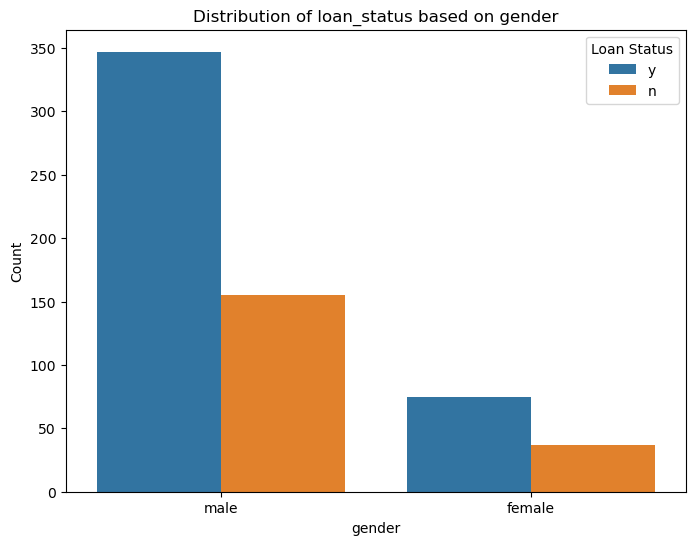

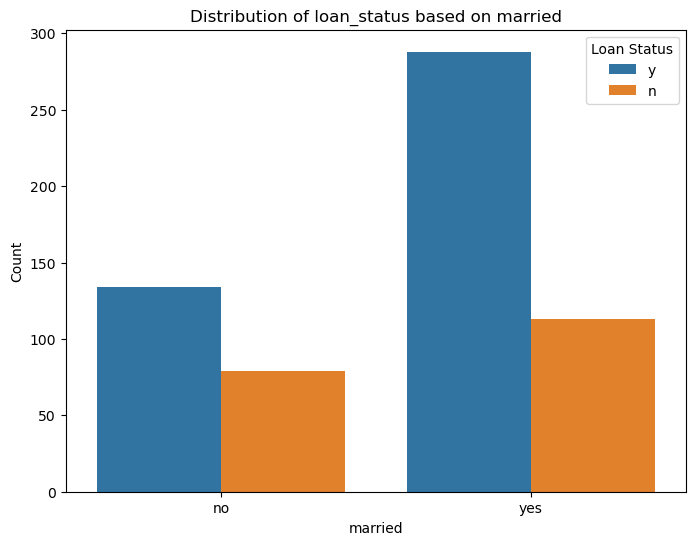

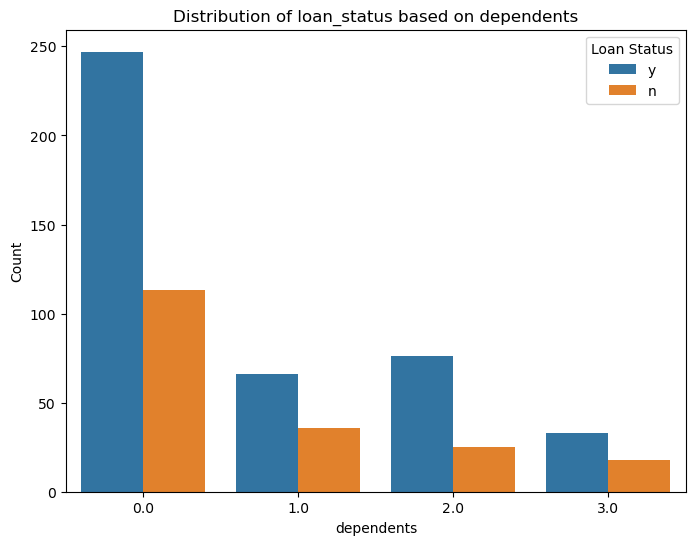

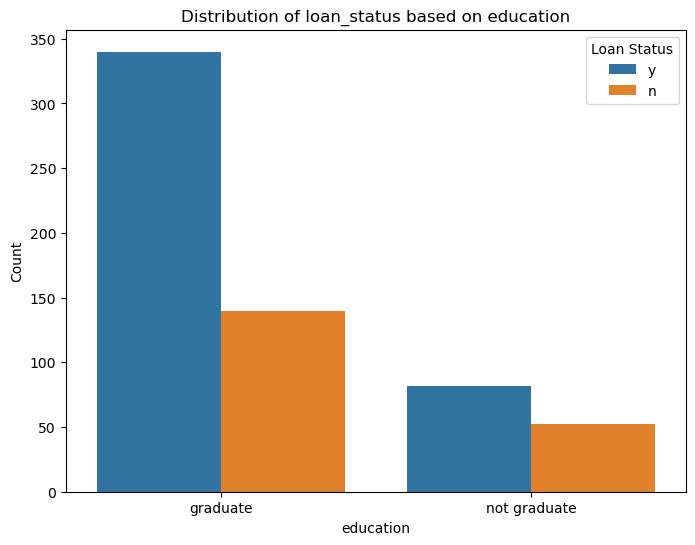

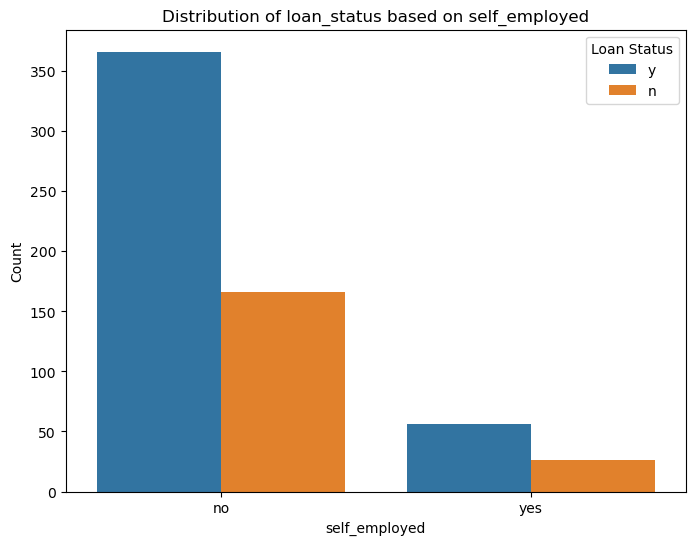

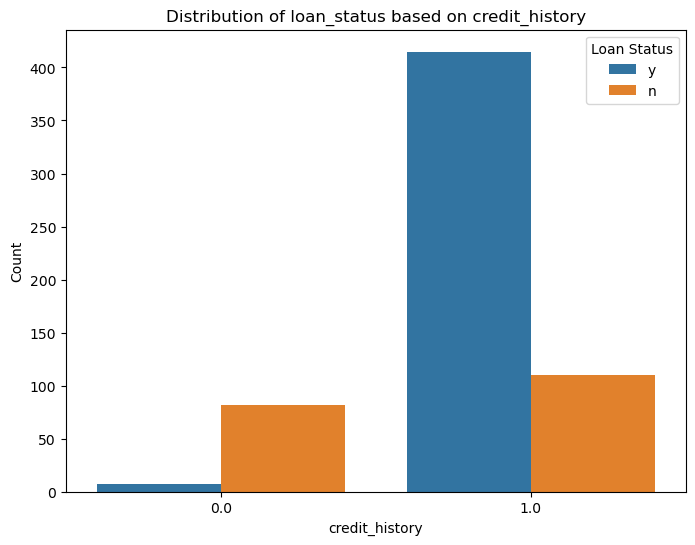

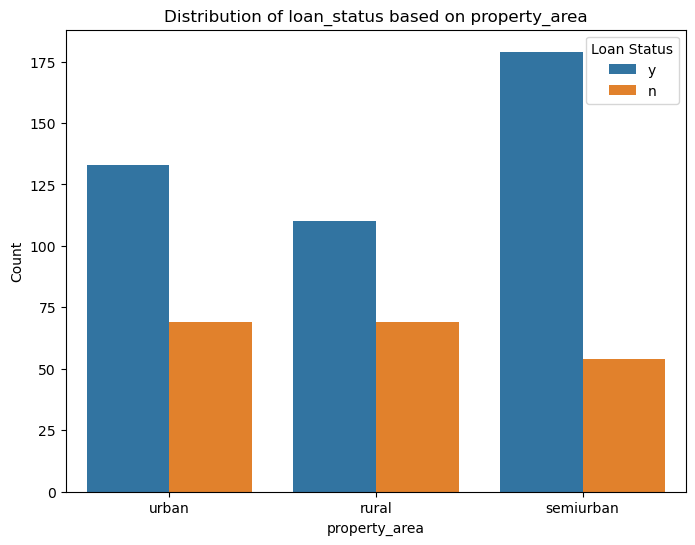

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each categorical feature
categorical_features = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Distribution of loan_status based on {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan Status')
    plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding for categorical features
categorical_features = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area']

label_encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression
import pickle

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('loan_status_model.pkl', 'wb') as file:
    pickle.dump(model, file)
